# Graph Database Benchmark, Query Performance Results

**Note**: *the [query_reports](query_reports.py) module imported below is in the hereby notebook directory.*

In [1]:
# Some common initialiasion
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.core.display import HTML

# As said above, this is in the same dir where this notebook is
import query_reports as qrep
pd.set_option ( 'display.max_columns', 500 )

## Queries and Query Categories
As explained in the main [README][10], we have the following queries and query categories:

[10]: https://github.com/Rothamsted/graphdb-benchmarks/tree/master#readme

In [2]:
# DO NOT EDIT MANUALLY! This was generated through: 
# mvn test -Dtest='QueryListTest#testJsonOut'
#
all_queries = {
  "counts": [
    "cnt",
    "cntType",
    "cntRel",
    "cntRelType"
  ],
  "selects": [
    "sel",
    "join",
    "joinRel",
    "joinFilter",
    "joinRe",
    "joinReif"
  ],
  "unions": [
    "2union",
    "2union1Nest",
    "2union1Nest+",
    "pway",
    "exist",
    "existAg"
  ],
  "aggregation": [
    "grp",
    "grpAg",
    "mulGrpAg",
    "nestAg"
  ],
  "paths": [
    "varPathC",
    "varPath",
    "shrtSmf",
    "medSmf",
    "lngSmf"
  ]
}

And we have tested them against different datasets and graph databases:

In [3]:
# Internal ID -> Label used here
datasets = { 
  "biopax": "biopax",
  "arabidopsis": "ara",
  "poaceae": "cereals"
}

# internal ID => Label Used Here
databases = {
  "sparql": "virt",
   "neo": "neo",
   "arcade": "arc"
}

We ran all the queries for each combination of dataset/DB, and produded 1 result file for each of them:

In [4]:
raw_results = qrep.get_raw_results ( datasets, databases )

## Results summaries
In the tables below, a per-category summary of all the times taken in the various combinations of datasets and databases.

*Note: where the time is 'inf' and sdev is '-', it's because no query succeded to complete before a set timeout of 20s.*

In [5]:
# You can skip the following code if you're interested in the resulting tables only.
data_summaries = qrep.get_all_summary_data ( datasets, databases, all_queries, raw_results )

,biopax/virt Time,biopax/virt sdev,biopax/neo Time,biopax/neo sdev,biopax/arc Time,biopax/arc sdev,ara/virt Time,ara/virt sdev,ara/neo Time,ara/neo sdev,ara/arc Time,ara/arc sdev,cereals/virt Time,cereals/virt sdev,cereals/neo Time,cereals/neo sdev,cereals/arc Time,cereals/arc sdev
Name,,,,,,,,,,,,,,,,,,
cnt,220.441176,7.650242,0.413793,0.494649,135.018349,2.112492,2028.803150,82.886616,0.456140,0.639972,900.707965,37.951021,8943.053097,58.197300,0.295082,1.080928,4896.591241,1539.757800
cntType,3.931034,17.704200,4.700935,5.291886,147.547619,1.536787,3.795455,15.744011,4.214286,5.157685,955.573529,12.028751,71.201681,602.310419,6.947826,4.213270,5072.715517,1571.163041
cntRel,10.192661,0.396210,0.408000,0.493441,429.620155,10.161350,25.056911,3.219563,0.487603,0.579018,3859.858209,57.551566,77.172131,1.231089,0.225000,1.305853,20424.434109,2995.374762
cntRelType,15.489209,28.341951,6.571429,6.282701,0.209091,0.560070,25.148438,39.668725,7.233645,6.242852,0.458015,2.054112,44.257732,132.162170,7.774648,4.683447,0.489583,0.994668


,biopax/virt Time,biopax/virt sdev,biopax/neo Time,biopax/neo sdev,biopax/arc Time,biopax/arc sdev,ara/virt Time,ara/virt sdev,ara/neo Time,ara/neo sdev,ara/arc Time,ara/arc sdev,cereals/virt Time,cereals/virt sdev,cereals/neo Time,cereals/neo sdev,cereals/arc Time,cereals/arc sdev
Name,,,,,,,,,,,,,,,,,,
sel,6.323529,0.980418,1.177778,0.689653,3.298246,0.967890,3.038760,0.979502,1.057377,0.266572,4.299145,1.876649,3.818841,0.543515,1.383333,2.146654,3.193548,9.658121
join,5.664122,0.708310,2.395161,15.084488,18.830000,0.865209,6.400000,0.861357,1.059829,0.302022,650.367647,7.436456,7.147287,0.469387,1.452381,4.738957,4158.740741,1802.350534
joinRel,7.180952,0.386825,1.442478,0.865387,2.461538,0.706052,10.252101,2.030356,1.475410,0.980918,2.991071,0.821946,12.707143,0.605686,1.639706,3.054257,3.552239,1.235850
joinFilter,5.163636,0.567099,10.860656,0.964798,0.679104,2.119018,4.913793,1.512665,10.522124,1.408503,0.992806,0.619682,5.159292,0.434379,10.500000,4.322578,8.945736,8.300330
joinRe,5.916667,0.791575,11.542373,0.902457,29.075000,5.071195,6.604651,13.665318,11.405405,0.975876,716.983740,80.724687,6.821138,0.713253,11.058824,2.611234,4070.148760,737.270752
joinReif,7.752475,0.555085,1.698113,0.571878,6.401961,18.240017,10.712963,1.260848,2.133333,0.401490,13.245763,91.079184,13.308271,0.653434,3.268293,7.159853,9.661765,5.148492


,biopax/virt Time,biopax/virt sdev,biopax/neo Time,biopax/neo sdev,biopax/arc Time,biopax/arc sdev,ara/virt Time,ara/virt sdev,ara/neo Time,ara/neo sdev,ara/arc Time,ara/arc sdev,cereals/virt Time,cereals/virt sdev,cereals/neo Time,cereals/neo sdev,cereals/arc Time,cereals/arc sdev
Name,,,,,,,,,,,,,,,,,,
2union,12.563025,0.576939,2.093750,0.788075,40.352459,5.825169,10.568966,1.439953,2.100917,1.254215,32.504274,7.608552,14.250000,0.455200,3.127119,10.226116,47.842105,13.955471
2union1Nest,9.275510,0.471467,15.968000,1.331601,40.773109,1.475431,10.776596,1.108659,19.338710,1.081155,32.456140,1.635558,14.676471,1.127977,29.434783,12.845322,51.604651,20.603936
2union1Nest+,9.488550,2.220071,17.034783,1.990902,40.629921,1.349916,11.094828,2.358992,17.719008,1.324281,33.224806,12.594170,16.053097,16.236995,28.291262,34.118488,49.222222,16.513698
pway,61.452381,1.077829,41.680000,1.771640,152.171875,6.461405,39.323232,1.412974,34.664179,1.232053,751.533898,14.937867,49.883929,0.581169,67.892473,14.867138,3725.034783,1237.572900
exist,14.056075,0.563543,11.015504,0.847648,11.388889,2.182485,19.785714,1.487530,5.543103,0.677492,13.100840,7.149013,141.253623,0.616815,8.025000,14.766225,44.758065,20.835543
existAg,34.396396,0.607218,14.716667,0.980339,50.842105,1.211324,42.780488,1.944039,12.342105,0.762262,56.633094,4.036328,379.893204,0.999143,22.327869,26.320166,116.020202,47.147398


,biopax/virt Time,biopax/virt sdev,biopax/neo Time,biopax/neo sdev,biopax/arc Time,biopax/arc sdev,ara/virt Time,ara/virt sdev,ara/neo Time,ara/neo sdev,ara/arc Time,ara/arc sdev,cereals/virt Time,cereals/virt sdev,cereals/neo Time,cereals/neo sdev,cereals/arc Time,cereals/arc sdev
Name,,,,,,,,,,,,,,,,,,
grp,6.689655,0.565897,7.238411,0.607822,24.476563,1.190281,7.201613,2.371853,12.237288,16.713615,746.389831,14.935779,346.773109,0.969335,18.345794,4.629892,4704.354331,1628.997152
grpAg,8.583333,1.132731,7.299145,0.698088,39.807339,23.426590,8.319588,0.810689,10.885246,0.919906,39.380952,1.474352,13.067961,12.024699,18.300752,4.339713,14.680412,11.004304
mulGrpAg,50.000000,0.995927,45.274074,2.244162,53.801724,3.093387,29.008403,1.654454,51.971223,1.769068,56.979167,6.894665,376.944444,0.721283,87.000000,17.525625,155.907407,60.228775
nestAg,8.595420,0.617422,7.108911,0.786142,54.478632,6.147046,15.782258,2.062284,10.875969,1.346336,56.575000,1.818035,348.768595,0.680200,18.272727,5.665686,33.392593,15.793016


,biopax/virt Time,biopax/virt sdev,biopax/neo Time,biopax/neo sdev,biopax/arc Time,biopax/arc sdev,ara/virt Time,ara/virt sdev,ara/neo Time,ara/neo sdev,ara/arc Time,ara/arc sdev,cereals/virt Time,cereals/virt sdev,cereals/neo Time,cereals/neo sdev,cereals/arc Time,cereals/arc sdev
Name,,,,,,,,,,,,,,,,,,
varPathC,8.155039,14.082597,1.781250,1.097395,81.638655,31.534412,10.000000,3.297883,2.039370,1.217606,88.301724,40.151067,9.858333,3.358911,2.798450,5.287633,211.457627,177.929768
varPath,357.793388,10.052294,3.310078,0.647090,64.616541,4.027786,98.305344,2.950601,1.609091,0.591925,77.527273,114.999378,4.214876,0.432177,3.803419,11.332924,131.681034,52.865309
shrtSmf,2.140496,0.348946,0.708333,0.570947,0.358974,0.516312,14.679245,2.765595,2.781513,0.506896,5.900000,0.918215,229.125984,1.657078,3.038095,8.605593,21.293103,8.118703
medSmf,10.211382,0.617398,0.557252,0.556919,0.550388,0.759947,46.255814,6.497931,2.355769,1.525946,2140.144330,15.970670,3148.770992,3.001448,3.962963,11.053741,3312.796610,1290.639625
lngSmf,22.276923,0.622764,0.690000,0.761378,1.198347,0.702612,92.201613,2.482393,35.230159,1.153518,inf,-,17004.155963,29.184018,20.548387,104.261269,inf,-


## Result Charts

We can use the tables above to show the data in bar charts. Again, we're showing one chart per category.
*Note: for the queries that timed out in all the repetitions, we set a conventional high time (see the code below for details).*

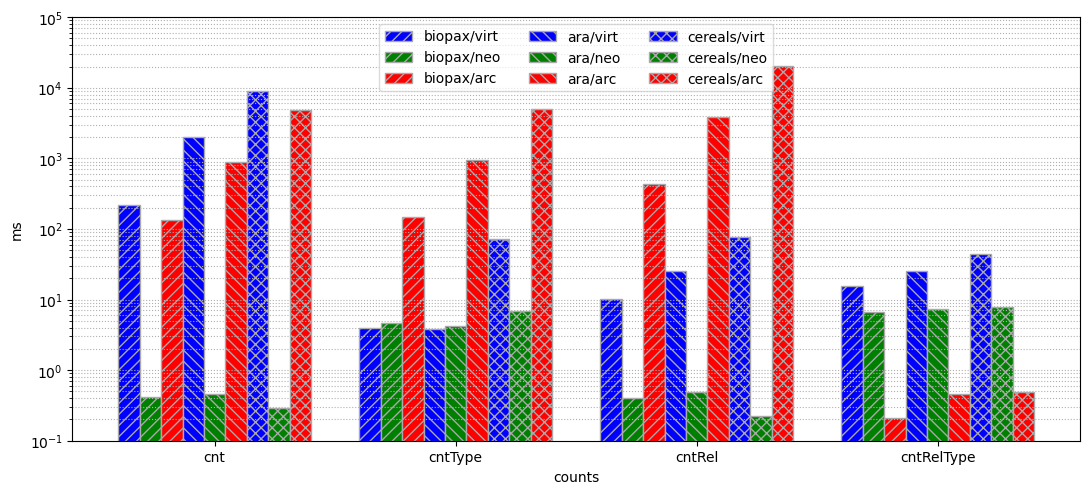

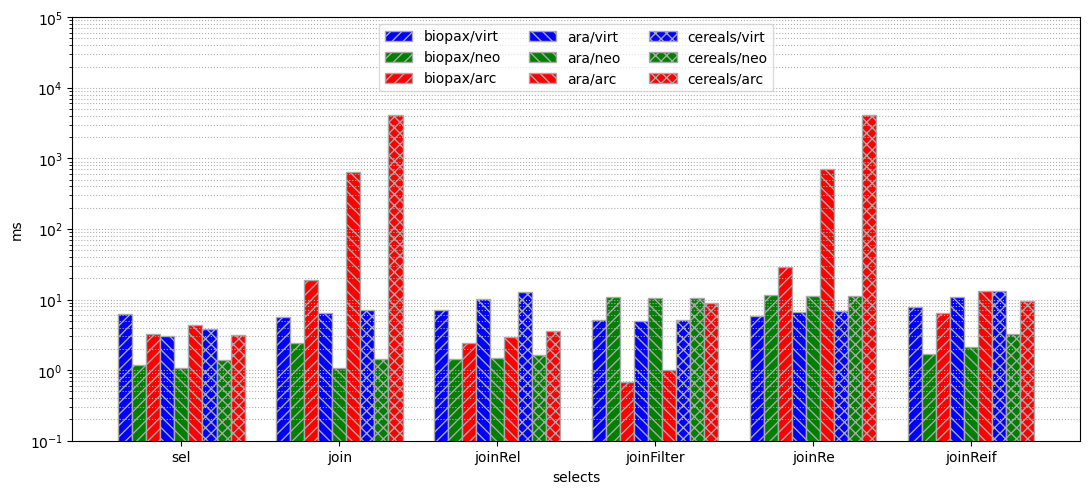

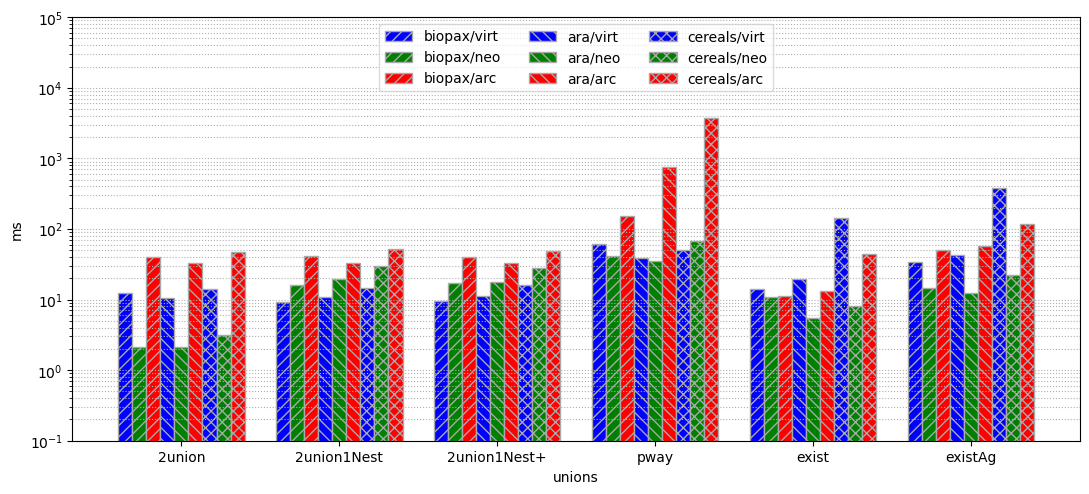

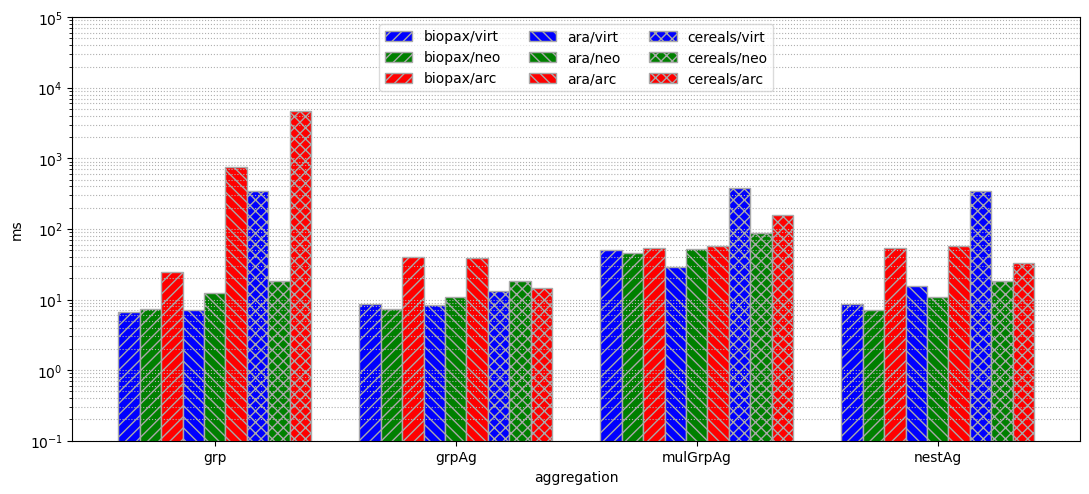

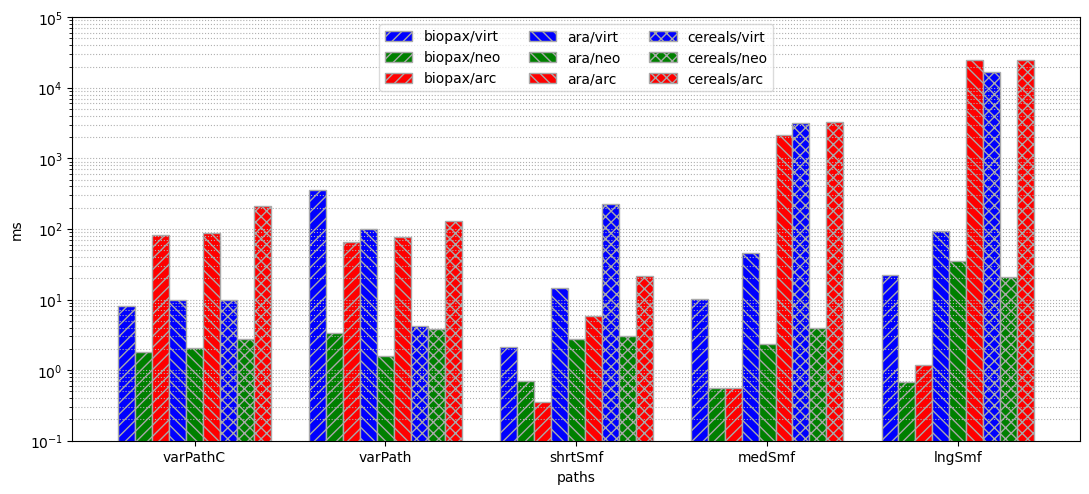

In [6]:
# You can skip the following code if you're interested in the resulting charts only.
qrep.query_charts ( datasets, databases, all_queries, data_summaries )

## Some Analysis
* On average, all have reasonable performance, with most results in the order of 100ms.
* Neo4j is the fastest in a number of cases, but Virtuoso performs well too.
* All DBs scale well, except Gremlin/ArcadeDB for the cases where performance is more sensitive to the way in which the queries are written (see below).
* the counting queries varies a lot, presumably because certain whole graph data (eg, no. of nodes and edges are stored in databases like Neo4j). 
* The selections are the fastest, most homogeneous and mostly scalable
  * in this group, 'join' and 'joinRel' are similar and simple joins, and they're similar to other join queries in the group. The major difference is that the Gremlin traversal in the faster queries limits the results to be returned ( `limit( 100 )` step or filtering steps) at the beginning of the traversal pattern. This shows that automatic Gremlin optimisation isn't as available as for other languages and the query writer has to take more care of writing optimised queries. We are also aware that moving the limit() filter towards the begin of the traversal makes the semantics of the 'joinRel' query slightly different than the SPARQL and Cypher equivalent, yet this difference is not much relevant when such result truncation is used to find all the query results in a paged fashion, so we compared the three query flavours anyway. 
* Apart from the 'counts' group, aggregations, unions and paths/traversal queries are the slowest. This matches other [benchmarks in literature][BERLIN-BENCH] and the fact this kind of queries are notoriously hard to optimise, and/or require to deal with much data.
* Neo4j performs well with semantic motif queries, which are essentially chain paths. It's perhaps surprising that the combination of Gremlin and ArcadeDB are slow and not scalable with such queries. By comparing the `shortSmf` case with the other two (`medSmf`, `lngSmf`) the main differences are that there aren't variable-lenght relation patterns, and that the volume of matched data is increasingly higher. This confirms the considerations made for the join queries.

[BERLIN-BENCH]: https://www.igi-global.com/article/berlin-sparql-benchmark/4112
